# Modul 2 Sains Data: Imputasi, Visualisasi, *Feature Engineering*

Kembali ke [Sains Data](./saindat2024genap.qmd)

Pada modul ini kita akan mempelajari beberapa cara untuk membuat visualisasi data menggunakan package Matplotlib dan Seaborn. Seaborn merupakan salah satu package visualisasi data yang sangat sering digunakan karena fleksibilitas dan banyaknya jenis plot yang disediakan.

## Prerequisites

### Import Module

Sebelum memulai, mari kita import terlebih dahulu module - module yang diperlukan.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

Pada module kali ini, akan digunakan tiga data csv yang berbeda untuk mempermudah kebutuhan visualisasi. 

Ketiga data tersebut dapat kalian unduh pada tautan berikut: [https://bit.ly/DataWeek2](https://bit.ly/DataWeek2)

In [3]:
spotify_df = pd.read_csv('data/week 2/spotify.csv', index_col='Date', parse_dates=['Date'])
flight_df = pd.read_csv('data/week 2/flight_delays.csv')
insurance_df = pd.read_csv('data/week 2/insurance.csv')

## Review Matplotlib

Seperti yang sudah dipelajari pada Algoritma dan Pemrograman, visualisasi data dapat dilakukan dengan module matplotlib, antara lain untuk membuat line plot dan scatter plot.

Pertama, kita akan menggunakan data Spotify, yaitu data total daily streams 5 lagu hits pada masanya.

In [4]:
spotify_df

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-01-05,4492978,3450315.0,2408365.0,2685857.0,2869783.0
2018-01-06,4416476,3394284.0,2188035.0,2559044.0,2743748.0
2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0


Berikut adalah cara untuk membuat line plot pada satu fitur di dataframe menggunakan matplotlib

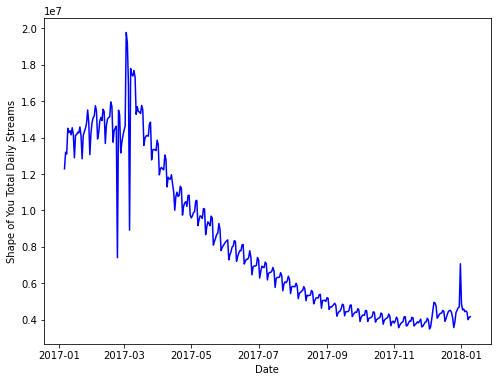

In [5]:
"""
Membuat line plot untuk lagu Shape of You menggunakan matplotlib
"""

# Mengatur besar figur plot
plt.subplots(figsize=(8,6))

# Membuat line plot
plt.plot(spotify_df['Shape of You'], 'b')
# Membuat label sumbu-x dan sumbu-y
plt.xlabel('Date')
plt.ylabel('Shape of You Total Daily Streams')
# Menampilkan plot
plt.show()

Apabila kita ingin menampilkan fitur-fitur lain dalam figur yang sama, kita dapat memanfaatkan loop

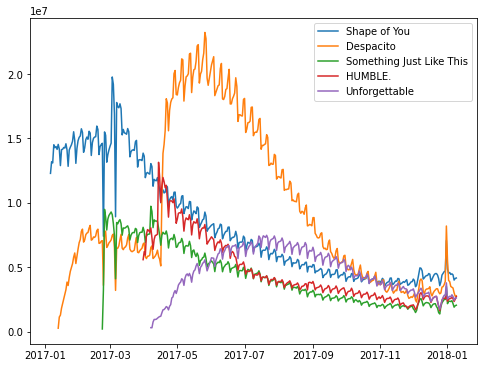

In [7]:
"""
Membuat line plot untuk semua lagu dalam spotify_df menggunakan loop
"""

plt.subplots(figsize=(8,6))

# Loop setiap nama kolom pada dataframe, lalu plot
for column in spotify_df.columns:
    plt.plot(spotify_df[column])

plt.legend(spotify_df.columns)
plt.show()

Namun, terdapat cara yang lebih mudah selain menggunakan looping. pandas dataframe memiliki method yang dapat secara langsung memvisualisasikan keseluruhan fiturnya, yaitu `.plot()`.

Pada `.plot()` kita memiliki beberapa parameter yang dapat diatur, antara lain `kind` dan `figsize`. `kind` berfungsi untuk mengatur jenis plot yang ingin kita buat, sedangkan `figsize` berfungsi untuk mengatur besar figur yang dihasilkan.

Parameter lainnya dapat dilihat pada: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

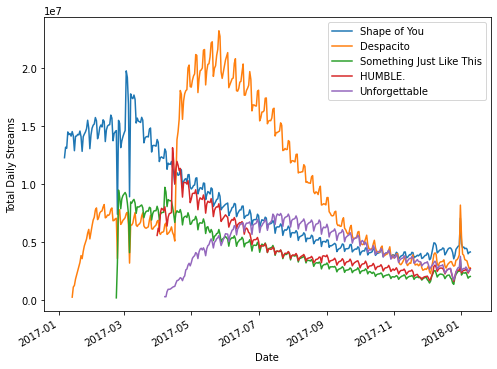

In [8]:
"""
Membuat line plot untuk semua lagu dalam spotify_df menggunakan pandas .plot()
"""

spotify_df.plot(kind='line', figsize=(8,6))
plt.xlabel('Date')
plt.ylabel('Total Daily Streams')
plt.show()

Selain line plot, terdapat banyak macam `kind` yang bisa digunakan. Pada code cell dibawah terlihat bahwa pandas `.plot()` dapat menghasilkan histogram (perlu diperhatikan bahwa jenis plot perlu menyesuaikan tipe data yang dimiliki, terlihat bahwa menggunakan data spotify, histogram tidak menghasilkan insight yang cukup berguna).  

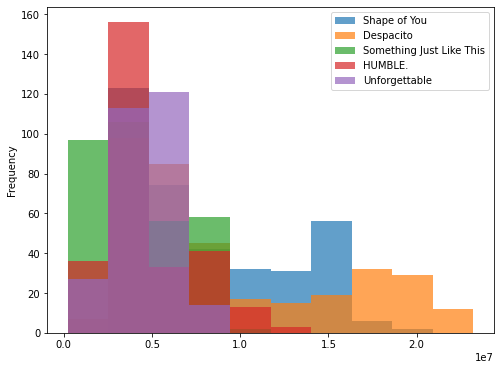

In [11]:
spotify_df.plot(kind='hist', figsize=(8,6), alpha=.7)

plt.show()

Pada praktikum Algoritma dan Pemrograman kita juga telah mempelajari cara untuk membuat scatter plot. Berikut code untuk membuat scatter plot menggunakan matplotlib, untuk melihat korelasi antara daily streams lagu Shape of You dengan Something Just Like This.

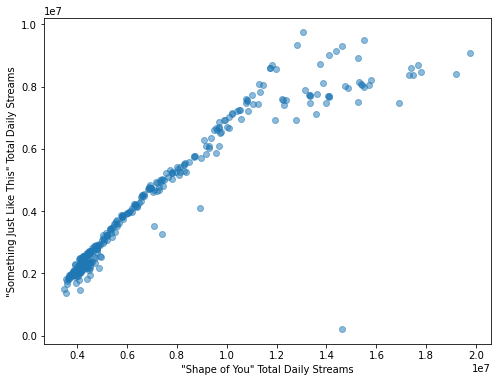

In [13]:
"""
Membuat scatter plot untuk melihat korelasi antara lagu
Shape of You dengan Something Just Like This menggunakan
matplotlib
"""

plt.subplots(figsize=(8,6))

plt.scatter(x=spotify_df['Shape of You'], 
            y=spotify_df['Something Just Like This'],
            alpha=.5)
plt.xlabel('"Shape of You" Total Daily Streams')
plt.ylabel('"Something Just Like This" Total Daily Streams')
plt.show()

## Pengenalan Seaborn

Walaupun matplotlib cukup fleksibel dalam menghasilkan plot, tetapi tipe plot yang disediakan cenderung terbatas. Oleh karena itu, kita dapat menggunakan Seaborn karena tipe plot yang disediakan sangat banyak sesuai kebutuhan kita, antara lain line, bar, heatmap, scatter, box, swarm, histogram, density, dan masih banyak lagi.

### Line Plot

Line plot biasa digunakan untuk melihat trend data dalam jangka waktu tertentu.

Untuk membuat line plot pada seaborn, kita dapat menggunakan `sns.lineplot()`. Jika data yang ingin kita visualisasikan adalah dataframe, kita dapat memasukkan variabel dataframe tersebut pada parameter `data`, seperti code di bawah ini.

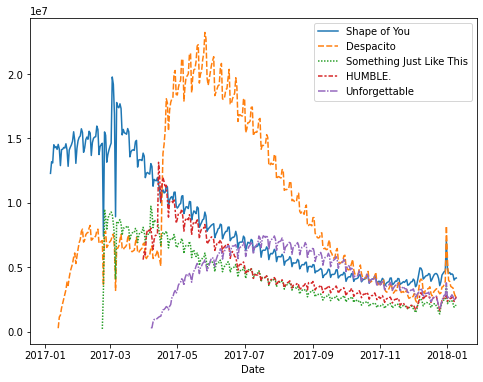

In [15]:
"""
Membuat line plot dengan module seaborn
"""

plt.subplots(figsize=(8,6))
sns.lineplot(data=spotify_df)
plt.show()

Fleksibilitas Seaborn membuat kita dapat memilih color palette yang sesuai dengan keinginan kita. Kita dapat memilih palette yang sudah disediakan oleh seaborn (antara lain: bright, deep, pastel, dan masih banyak lagi) atau kita dapat mengatur sendiri palette yang ingin kita gunakan.

Untuk memilih palette yang akan digunakan untuk plot selanjutnya pada seaborn, kita dapat menggunakan `sns.set_palette()`.

Jenis palette yang disediakan seaborn serta cara membuat color palette secara mandiri dapat dilihat pada:
https://seaborn.pydata.org/tutorial/color_palettes.html#tools-for-choosing-color-palettes

In [16]:
# Mengganti color palette menjadi "bright"
sns.set_palette('bright')

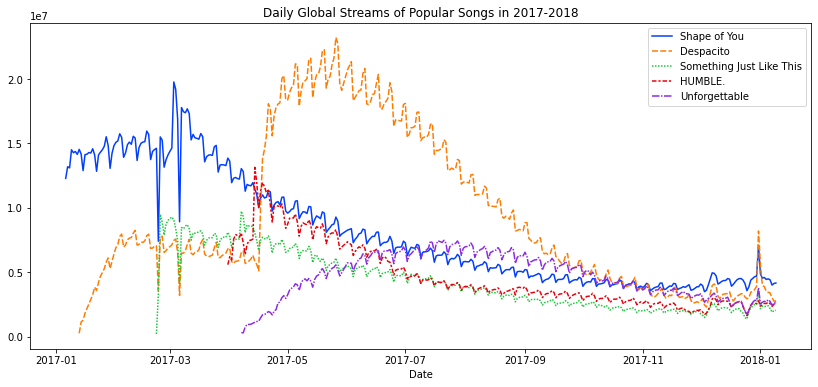

In [18]:
"""
Membuat line plot setelah color palette diubah menjadi "bright"
"""

# Mengatur besar figur yang ingin ditampilkan
plt.figure(figsize=(14,6))

# Membuat line plot
sns.lineplot(data=spotify_df)
# Membuat judul figur
plt.title("Daily Global Streams of Popular Songs in 2017-2018")
# Menampilkan plot
plt.show()

Apabila tidak semua fitur pada data ingin kita visualisasikan, kita dapat menggunakan `sns.lineplot()` beberapa kali, sesuai dengan banyaknya fitur yang ingin kita tampilkan, seperti pada code di bawah.

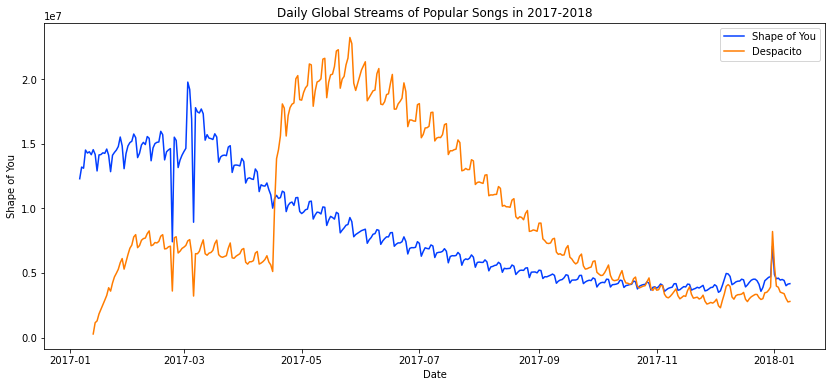

In [20]:
plt.figure(figsize=(14,6))

# Membuat line plot hanya dengan lagu Shape of You
sns.lineplot(data=spotify_df['Shape of You'], label="Shape of You")
# Menambahkan line plot pada figur dengan lagu Despacito
sns.lineplot(data=spotify_df['Despacito'], label="Despacito")

plt.title("Daily Global Streams of Popular Songs in 2017-2018")
plt.xlabel("Date")
plt.ylabel('')
plt.show()

### Bar Plot

Bar plot biasa digunakan untuk membandingkan kuantitas/nilai pada data bertipe kategori.

Selanjutnya, kita akan menggunakan data flight_delays.csv, yaitu data rata-rata keterlambatan beberapa maskapai pesawat pada setiap bulannya.

In [39]:
flight_df

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
5,6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
6,7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
7,8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
8,9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260
9,10,-0.580930,-2.993617,3.676787,-5.011516,2.303760,0.082127,0.467074,-3.735054,6.810736,1.750897,-2.456542,NaN,2.254278,-0.688851


Untuk membuat bar plot pada seaborn dengan dataframe, kita dapat menggunakan `sns.barplot()` dengan tiga parameter yang wajib kita set, yaitu:
    
    - data: dataframe yang ingin kita visualisasikan

    - x: nama fitur pada dataframe yang ingin kita jadikan sumbu-x
    
    - y: nama fitur pada dataframe yang ingin kita jadikan sumbu-y

Pada kode di bawah, juga digunakan satu parameter opsional, yaitu `palette` yang merupakan cara lain untuk mengatur color palette yang ingin kita gunakan

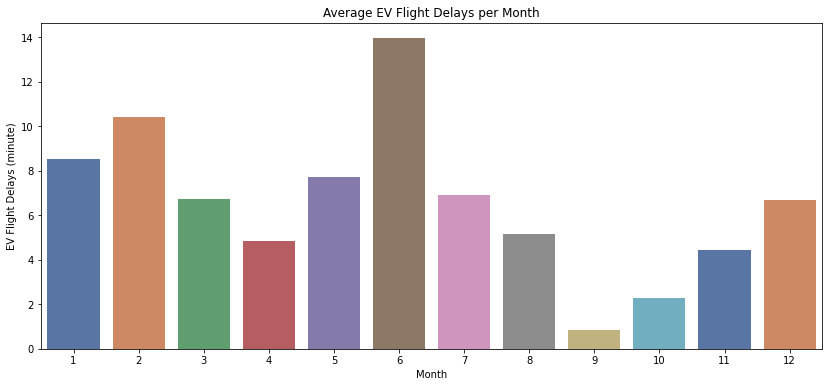

In [22]:
"""
Membuat bar plot keterlambatan maskapai EV setiap 
bulannya menggunakan seaborn
"""

plt.figure(figsize=(14,6))

sns.barplot(data=flight_df, x='Month', y='EV',
            palette=sns.color_palette('deep'))
plt.ylabel('EV Flight Delays (minute)')
plt.title('Average EV Flight Delays per Month')
plt.show()

Berdasarkan hasil plot di atas, terlihat bahwa maskapai EV memiliki rata-rata keterlambatan terlama pada bulan Juni, serta tercepat pada bulan September.

Selanjutnya, mari kita coba lihat urutan rata-rata keterlambatan semua maskapai dalam satu tahun (maskapai mana yang memiliki rata-rata keterlambatan terlama, serta maskapai mana yang tercepat).

Hal pertama yang perlu kita lakukan adalah, jadikan fitur `Month` sebagai index dataframe.

In [23]:
# Set fitur "Month" menjadi index dataframe
flight_df = flight_df.set_index('Month')
flight_df.head(2)

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363


Selanjutnya, kita perlu hitung rata-rata keterlambatan tiap maskapai dalam satu tahun, yaitu hitung rata-rata tiap kolom pada dataframe menggunakan `.mean()` (Tambahan: apabila kita ingin menghitung rata-rata tiap barisnya, kita dapat menggunakan parameter `axis=1` pada `.mean()`). `.mean()` akan menghasilkan pandas Series.

Lalu, agar mempermudah kita dalam melihat visualisasi bar plotnya, kita dapat menggunakan `.sort_values()`.

In [25]:
# Simpan rata-rata keterlambatan semua maskapai dalam satu tahun pada variabel flight_mean_inyear
flight_mean_inyear = flight_df.mean()
# Urutkan flight_mean_inyear secara ascending
flight_mean_inyear = flight_mean_inyear.sort_values()

flight_mean_inyear

AS    -1.023656
DL     0.231116
HA     1.993205
US     3.776815
AA     4.120776
WN     4.275277
VX     4.717718
UA     5.413415
OO     5.909658
MQ     5.964953
EV     6.543328
B6     6.788370
F9    13.035736
NK    14.549663
dtype: float64

Terakhir, visualisasikan bar plot menggunakan cara seperti sebelumnya.

Kita dapat lihat pada code dibawah bahwa tidak digunakan parameter `data`, karena flight_mean_inyear merupakan pandas Series (bukan dataframe) sehingga lebih mudah jika kita langsung menggunakan parameter `x` dan `y` saja.

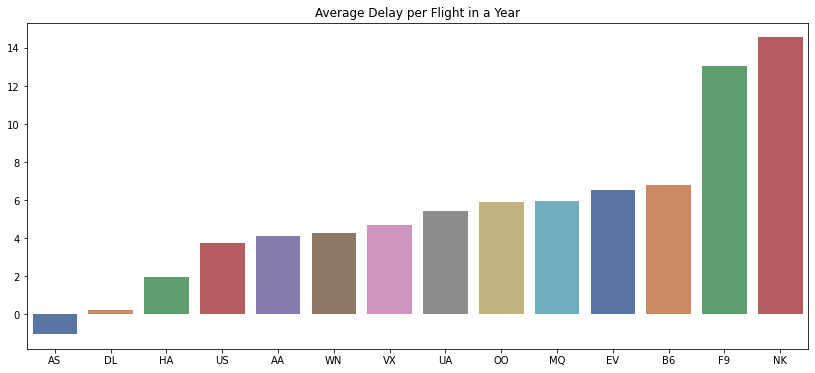

In [26]:
plt.subplots(figsize=(14,6))
sns.barplot(x=flight_mean_inyear.index, 
            y=flight_mean_inyear.values,
            palette=sns.color_palette('deep'))
plt.title('Average Delay per Flight in a Year')
plt.show()

Berdasarkan plot diatas, NK merupakan maskapai dengan rata-rata keterlambatan terlama dalam satu tahun, sedangkan AS adalah yang tercepat (AS bernilai negatif yang berarti rata-rata kedatangan pesawat lebih cepat dari yang dijadwalkan dalam satu tahun.

### Heatmap

Heatmap biasa digunakan untuk mempermudah melihat pola pada data berdasarkan warna yang dihasilkan.

Pada seaborn, kita dapat menggunakan heatmap dengan `sns.heatmap()` seperti pada kode dibawah. Parameter `annot` berfungsi untuk menampilkan nilai data (jika True) atau tidak (jika False).

Bar sebelah kanan heatmap menunjukkan bahwa, semakin lama keterlambatan pesawat, maka warna yang dihasilkan semakin terang. Sebaliknya, semakin gelap warna yang dihasilkan berarti semakin cepat pesawat datang tersebut.

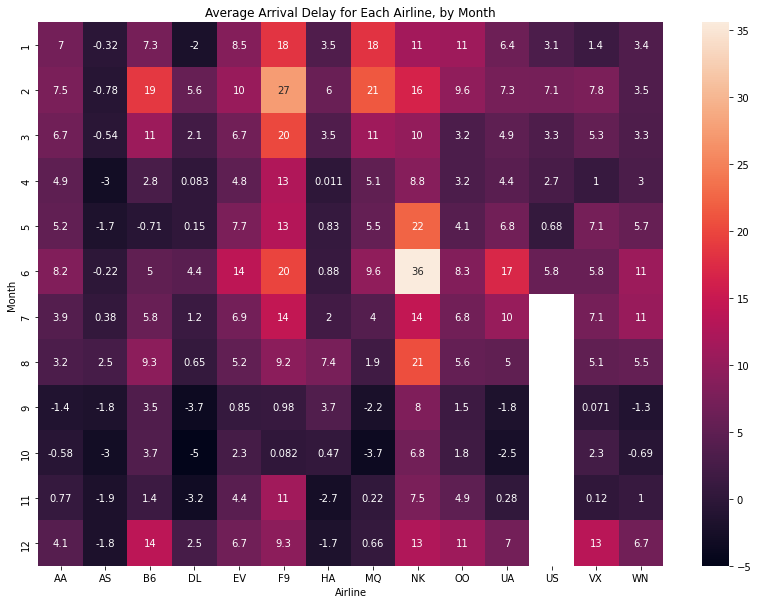

In [27]:
"""
Membuat heatmap menggunakan Seaborn
"""
plt.figure(figsize=(14,10))

sns.heatmap(data=flight_df, annot=True)
plt.title("Average Arrival Delay for Each Airline, by Month")
plt.xlabel("Airline")
plt.show()

Berdasarkan heatmap di atas, kita dapat melihat dengan mudah pada bulan apa suatu maskapai sangat terlambat (contoh: maskapai NK pada bulan Juni).

Heatmap sangat sering digunakan untuk melihat korelasi antarfitur pada dataset agar kita dapat mengerti lebih jauh tentang fitur-fitur pada data, atau juga dapat dimanfaatkan untuk melakukan feature selection sebelum membuat sebuat model Machine Learning.

Untuk melakukan hal tersebut, kita perlu menghitung dahulu korelasi antar fitur menggunakan pandas `.corr()`, yaitu fungsi yang akan menghitung korelasi antar dua fitur menggunakan korelasi Pearson.

Notes: Metode korelasi dapat diubah dengan menggunakan parameter `method` pada `.corr()`, contoh: `.corr(method='spearman')`. Metode lainnya dapat dilihat pada: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [28]:
# Hitung korelasi antar dua fitur pada flight_df
flight_corr = flight_df.corr()

flight_corr

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
AA,1.000000,0.334980,0.429854,0.805229,0.896523,0.903986,0.220065,0.842701,0.573716,0.620477,0.809874,0.823713,0.425237,0.615664
AS,0.334980,1.000000,0.340359,0.394359,0.356608,0.336791,0.684979,0.283977,0.480863,0.350657,0.457414,0.489025,0.229571,0.519228
B6,0.429854,0.340359,1.000000,0.643313,0.342627,0.510718,0.467905,0.529724,0.032038,0.591115,0.233021,0.788345,0.579750,0.151750
DL,0.805229,0.394359,0.643313,1.000000,0.796951,0.783265,0.262251,0.598765,0.625277,0.569073,0.797339,0.821757,0.700605,0.691805
EV,0.896523,0.356608,0.342627,0.796951,1.000000,0.828515,0.099369,0.721468,0.784026,0.692697,0.911499,0.669736,0.462638,0.730115
F9,0.903986,0.336791,0.510718,0.783265,0.828515,1.000000,0.273878,0.912984,0.414064,0.582509,0.671986,0.878874,0.308397,0.465765
HA,0.220065,0.684979,0.467905,0.262251,0.099369,0.273878,1.000000,0.436015,0.176485,0.056941,0.066821,0.586160,-0.008439,-0.007296
MQ,0.842701,0.283977,0.529724,0.598765,0.721468,0.912984,0.436015,1.000000,0.281890,0.586963,0.503575,0.660181,0.150111,0.239744
NK,0.573716,0.480863,0.032038,0.625277,0.784026,0.414064,0.176485,0.281890,1.000000,0.365273,0.827455,0.293515,0.395419,0.742869
OO,0.620477,0.350657,0.591115,0.569073,0.692697,0.582509,0.056941,0.586963,0.365273,1.000000,0.626051,0.590313,0.561515,0.548304


Pandas `.corr()` menghasilkan dataframe dengan nama baris dan kolom yang sama, serta berisi nilai korelasi antara baris dan kolom yang ditinjau (contoh: korelasi antara maskapai AA dan AS adalah 0,334980). Serta, dataframe yang dihasilkan adalah sebuat matriks simetris.

Tentu dengan hanya melihat dataframe di atas, tidak terlihat begitu jelas mana fitur yang memiliki korelasi tinggi dan mana yang yang memiliki korelasi rendah. Oleh karena itu, kita dapat memanfaatkan heatmap.

Pada code di bawah, untuk mempermudah pembacaan heatmap, kita menggunakan parameter `vmin`, `vmax`, dan `center` pada `sns.heatmap()`. `vmin` berfungsi untuk mengatur nilai terendah, `vmax` berfungsi untuk mengatur nilai tertinggi, dan `center` berfungsi untuk mengatur nilai tengah pada heatmap. Korelasi Pearson menghasilkan nilai antara -1 hingga 1, sehingga kita dapat set ketiga parameter tersebut seperti pada code di bawah.

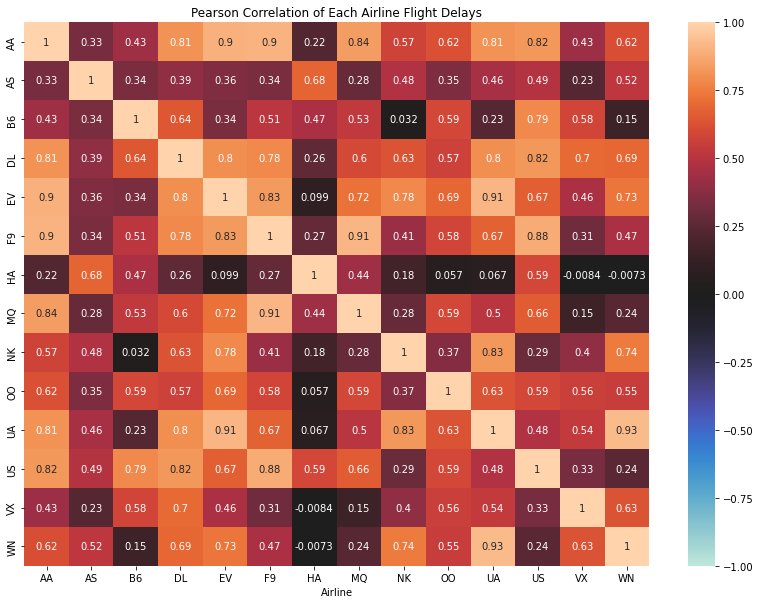

In [108]:
plt.figure(figsize=(14,10))

sns.heatmap(data=flight_corr, vmin=-1, vmax=1, center=0, annot=True)
plt.title("Pearson Correlation of Each Airline Flight Delays")
plt.xlabel("Airline")
plt.show()

Dengan menggunakan heatmap, sekarang terlihat bahwa mana maskapai yang keterlambatannya berkorelasi tinggi dan mana yang rendah. Misal, AA dan EV menghasilkan korelasi yang cukup tinggi positif, yaitu 0.9, yang artinya jika keterlambatan maskapai AA tinggi, begitu juga maskapai EV, dan sebaliknya jika keterlambatan maskapai AA rendah, begitu juga maskapai EV.

Untuk meyakinkan kita dengan hal tersebut, kita dapat lihat pada materi selanjutnya, yaitu Scatter Plot.

### Scatter Plot

Scatter plot biasa digunakan untuk melihat korelasi antara dua fitur bertipe numerik.

Untuk menggunakan scatter plot pada seaborn, kita dapat menggunakan `sns.scatterplot()`, dengan parameter yang sama seperti kita membuat bar plot.

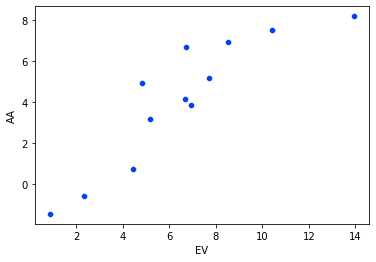

In [110]:
"""
Membuat scatter plot untuk melihat 
keterkaitan pada keterlambatan pesawat
maskapai EV dan AA
"""

sns.scatterplot(data=flight_df, x='EV', y='AA')
plt.show()

Melalui scatter plot di atas, kita dapat semakin yakin bahwa kesimpulan yang kita ambil dengan melihat heatmap sebelumnya benar.

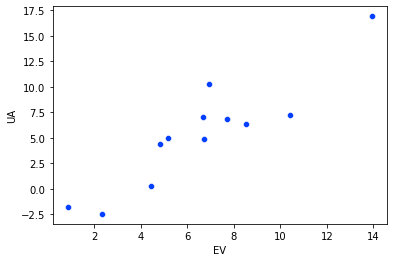

In [111]:
"""
Tambahan scatter plot pada maskapai lain yang
memiliki korelasi tinggi
"""

sns.scatterplot(data=flight_df, x='EV', y='UA')
plt.show()

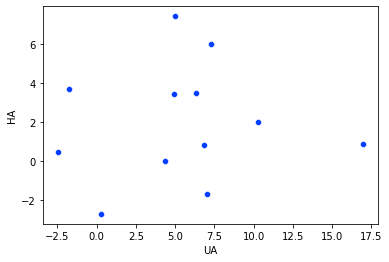

In [112]:
"""
Scatter plot pada maskapai yang memiliki
korelasi rendah (mendekati 0)
"""

sns.scatterplot(data=flight_df, x='UA', y='HA')
plt.show()

Pada heatmap, terlihat bahwa maskapai UA dan HA memiliki korelasi yang rendah, yaitu 0.067. Sehingga, jika kita buat scatter plotnya, menghasilkan plot seperti di atas.

Untuk memahami scatter plot lebih baik, kita akan menggunakan dataset lainnya, yaitu insurance.csv yang merupakan data berisi biaya asuransi (charges) beberapa orang.

In [29]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Misal, kita ingin melihat keterkaitan indeks massa tubuh (`bmi`) seseorang dengan biaya asuransi (`charges`) orang tersebut. Sama seperti sebelumnya, kita dapat melakukannya seperti pada code di bawah.

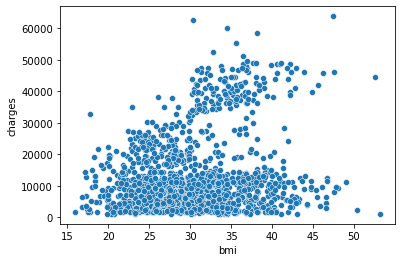

In [30]:
# Mengubah palette menjadi default
sns.set_palette('tab10')
# Membuat scatter plot antara fitur bmi dan charges
sns.scatterplot(data=insurance_df, x='bmi', y='charges')

plt.show()

Scatter plot di atas menunjukkan bahwa korelasi antara `bmi` dan `charges` adalah cenderung positif, tetapi tidak terlalu tinggi. Yang artinya, orang dengan BMI tinggi, cenderung akan membayar biaya asuransi lebih tinggi.

Agar kita semakin yakin dengan kesimpulan tersebut, kita dapat menambahakn garis regresi pada scatter plot tersebut dengan menggunakan `sns.regplot()`.

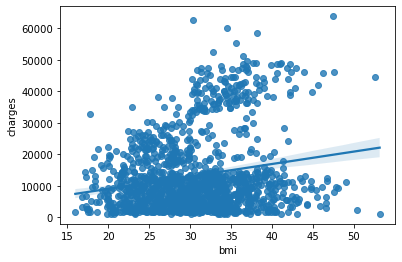

In [31]:
sns.regplot(data=insurance_df, x='bmi', y='charges')
plt.show()

Berdasarkan scatter plot dan garis regresi dihasilkan, terlihat bahwa kesimpulan yang kita ambil benar. Agar semakin yakin lagi, kita juga dapat menghitung langsung korelasi Pearsonnya menggunakan cara sebelumnya, yaitu pandas `.corr()`.

In [125]:
insurance_df[['bmi', 'charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


Dengan menggunakan seaborn, kita juga dapat memvisualisasikan scatter plot berdasarkan dengan pewarnaan yang berbeda berdasarkan fitur lainnya yang bertipe kategorik.

Misal, kita ingin membuat scatter plot antara fitur `bmi` dan `charges` dengan pewarnaannya berdasarkan nilai dari fitur `smoker`, yaitu yes atau no. Kita dapat set parameter `hue='smoker'` pada `sns.scatterplot()` seperti pada code di bawah.

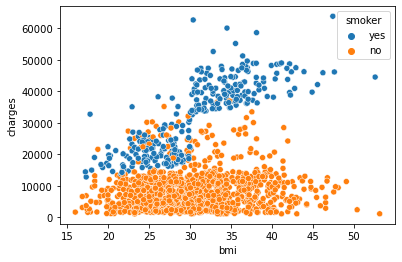

In [126]:
sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue='smoker')
plt.show()

Sehingga dihasilkan pewarnaan yang berbeda untuk seseorang yang merupakan perokok (biru) dan yang tidak (orange). Berdasarkan scatter plot di atas, terlihat bahwa korelasi antara `bmi` dan `charges` untuk perokok cendering tinggi positif (semakin besar `bmi`, semakin besar juga `charges`). Sedangkan, untuk bukan perokok, korelasinya cenderung rendah (semakin besar `bmi`, tidak terlalu berpengaruh terhadap `charges`).

Seperti cara sebelumnya, kita dapat menambahkan garis regresi. Namun, karena kita disini menggunakan `hue`, terdapat dua cara untuk menambahkan garis regresi, yaitu yang pertama adalah menggunakan `sns.regplot()` seperti di bawah ini.

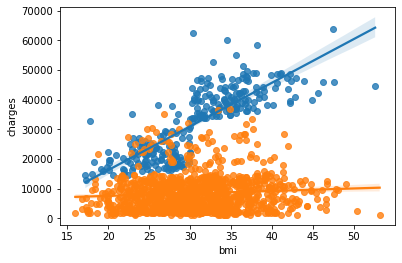

In [130]:
sns.regplot(data=insurance_df.query('smoker == "yes"'), x='bmi', y='charges') # axes 1
sns.regplot(data=insurance_df.query('smoker == "no"'), x='bmi', y='charges') # axes 2
plt.show()

Perhatikan bahwa `sns.regplot()` dipanggil dua kali karena fungsi tersebut tidak memiliki parameter `hue`. 

Untuk mempermudah, kita dapat menggunakan cara kedua, yaitu menggunakan `sns.lmplot()`. Cara kerja `sns.lmplot()` yaitu menggabungkan dua (atau lebih) `sns.regplot()` dalam satu figur. 

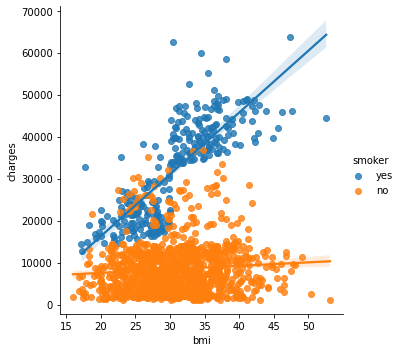

In [128]:
sns.lmplot(data=insurance_df, x='bmi', y='charges', hue='smoker')
plt.show()

### Box Plot dan Swarm Plot

Box plot dan swarm plot biasa digunakan untuk melihat keterkaitan antara data kategorik dan data numerik. Swarm plot biasa disebut sebagai "categorical scatter plot", karena plot yang dihasilkan mirip seperti scatter plot, tetapi untuk data kategorik.

Untuk menggunakan box plot pada seaborn kita dapat menggunakan `sns.boxplot()`.

Untuk menggunakan swarm plot pada seaborn kita dapat menggunakan `sns.swarmplot()`.

Misal, kita ingin melihat keterkaitan antara fitur `smoker` dan `charges` menggunakan swarm plot. Maka, kita dapat menggunakan code seperti di bawah ini.

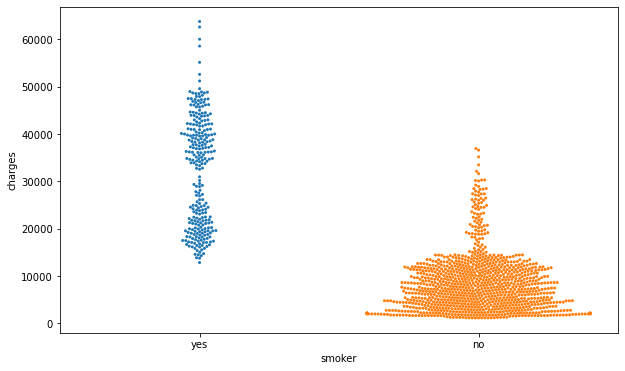

In [139]:
plt.subplots(figsize=(10,6))

sns.swarmplot(data=insurance_df, x='smoker', y='charges', size=3)
plt.show()

Berdasarkan swarm plot di atas, terlihat bahwa perokok cenderung memiliki biaya asuransi yang lebih tinggi dibandingkan yang bukan perokok. Selain itu, semakin lebar "swarm" pada suatu kategori berarti semakin banyak seseorang dengan nilai `charges` tersebut.

Apabila kita ingin menggunakan box plot, maka dapat digunakan code seperti di bawah ini.

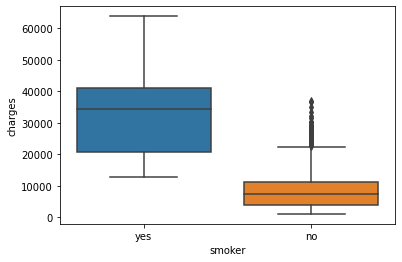

In [142]:
sns.boxplot(data=insurance_df, x='smoker', y='charges')
plt.show()

Pada box plot, terdapat dua istilah yang umum digunakan, yaitu "box" dan "whiskers". Pada box plot di atas, "box" merupakan persegi panjang berwarna biru dan orange. Garis di tengah box merupakan nilai mediannya, serta garis bawah dan garis atas box merupakan kuartil bawah (Q1) dan kuartil atas (Q3) secara berurutan. "Whiskers" adalah garis yang merupakan perpanjangan dari box. Ujung dari whiskers atas adalah Q3 + (1.5 x IQR) data, sedangkan ujung whiskers bawah adalah Q1 - (1.5 x IQR) data.

Titik di luar box dan whiskers tersebut adalah titik yang biasa dijadikan sebagai outlier (penentuan outlier diserahkan ke diri masing-masing, apakah hanya dengan melihat box plot atau dengan menggunakan metode lain, tetapi untuk mempermudah dapat menggunakan box plot).

### Histogram dan Density Plot

Selain box plot dan swarm plot, kita juga dapat melihat persebaran data menggunakan histogram dan density plot. Histogram biasa digunakan untuk melihat persebaran data secara diskrit, sedangkan density plot untuk melihat persebaran data secara kontinu.

Untuk membuat histogram pada seaborn, kita dapat menggunakan `sns.histplot()`.

Untuk membuat density plot pada seaborn, kita dapat menggunakan `sns.kdeplot()`.

Misal, kita ingin melihat persebaran dari fitur `charges` pada insurance_df. Maka dapat digunakan code seperti di bawah.

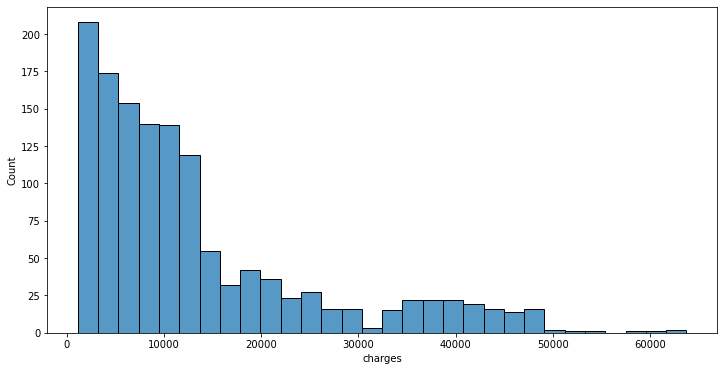

In [154]:
plt.subplots(figsize=(12,6))

sns.histplot(data=insurance_df, x='charges')
plt.show()

Berdasarkan histogram di atas, terlihat bahwa distribusi `charges` cenderung "skew" atau miring ke kanan. "Skewness" atau tingkat kecondongan merupakan aspek yang penting untuk diperhatikan ketika kita ingin membuat model Machine Learning.

Seperti scatter plot, kita juga dapat menentukan pewarnaan histogram berdasarkan fitur lainnya dengan menggunakan parameter `hue` seperti di bawah ini/

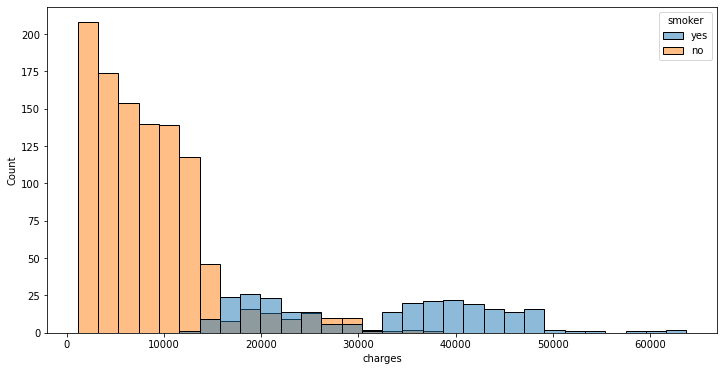

In [155]:
plt.subplots(figsize=(12,6))
sns.histplot(data=insurance_df, x='charges', hue='smoker')
plt.show()

Jika ingin membuat density plot dari fitur `charges`, kita dapat menggunakan kode seperti di bawah ini. Parameter `shade` berfungsi untuk memberikan warna di bawah kurva.

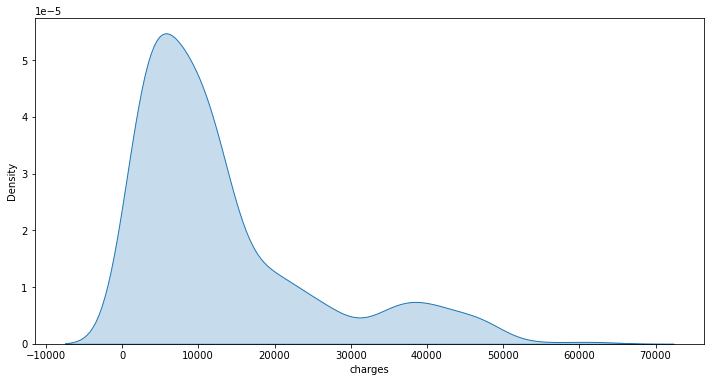

In [156]:
plt.subplots(figsize=(12,6))
sns.kdeplot(data=insurance_df, x='charges', shade=True)
plt.show()

`sns.kdeplot()` juga dapat menggunakan parameter `hue`.

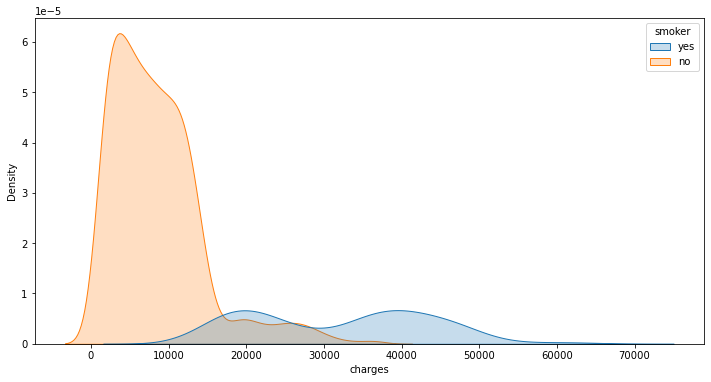

In [157]:
plt.subplots(figsize=(12,6))
sns.kdeplot(data=insurance_df, x='charges',
            hue='smoker', shade=True)
plt.show()

Apabila kita ingin menggabungkan histogram dan density plot dalam satu figur, kita dapat menggunakan `sns.histplot()` dengan parameter `kde=True`.

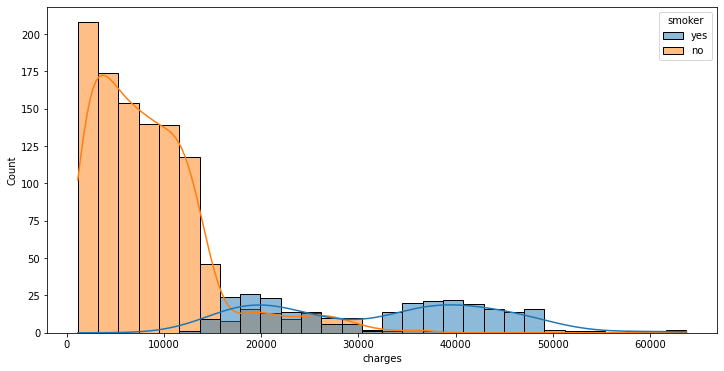

In [34]:
plt.subplots(figsize=(12,6))
sns.histplot(data=insurance_df, x='charges', hue='smoker', kde=True)
plt.show()

### Joint Plot

Pada seaborn, kita juga dapat membuat dua plot yang berbeda dari dua fitur dalam satu figur yang sama menggunakan `sns.jointplot()`.

Jenis plot yang dihasilkan dapat diatur pada parameter `kind`. Pilihan jenis `kind` yang disediakan dapat dilihat pada: https://seaborn.pydata.org/generated/seaborn.jointplot.html

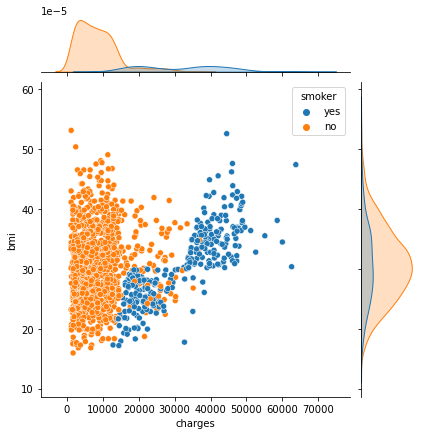

In [50]:
sns.jointplot(data=insurance_df, x='charges', y='bmi', hue='smoker', kind="scatter")

plt.show()

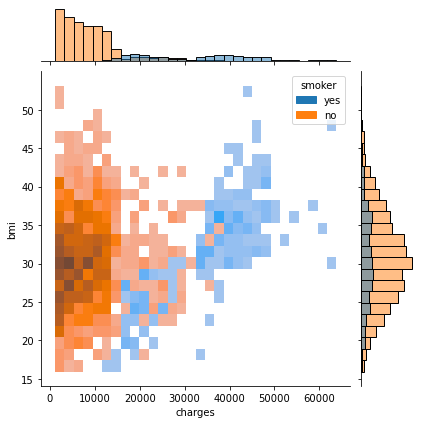

In [51]:
sns.jointplot(data=insurance_df, x='charges', y='bmi', hue='smoker', kind="hist")

plt.show()

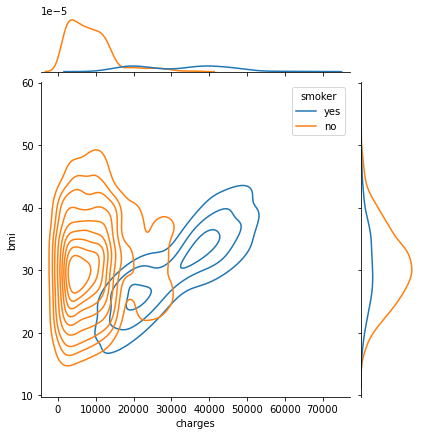

In [54]:
sns.jointplot(data=insurance_df, x='charges', y='bmi', hue='smoker', kind="kde")

plt.show()

## Supplementary: Panduan Pemilihan Plot

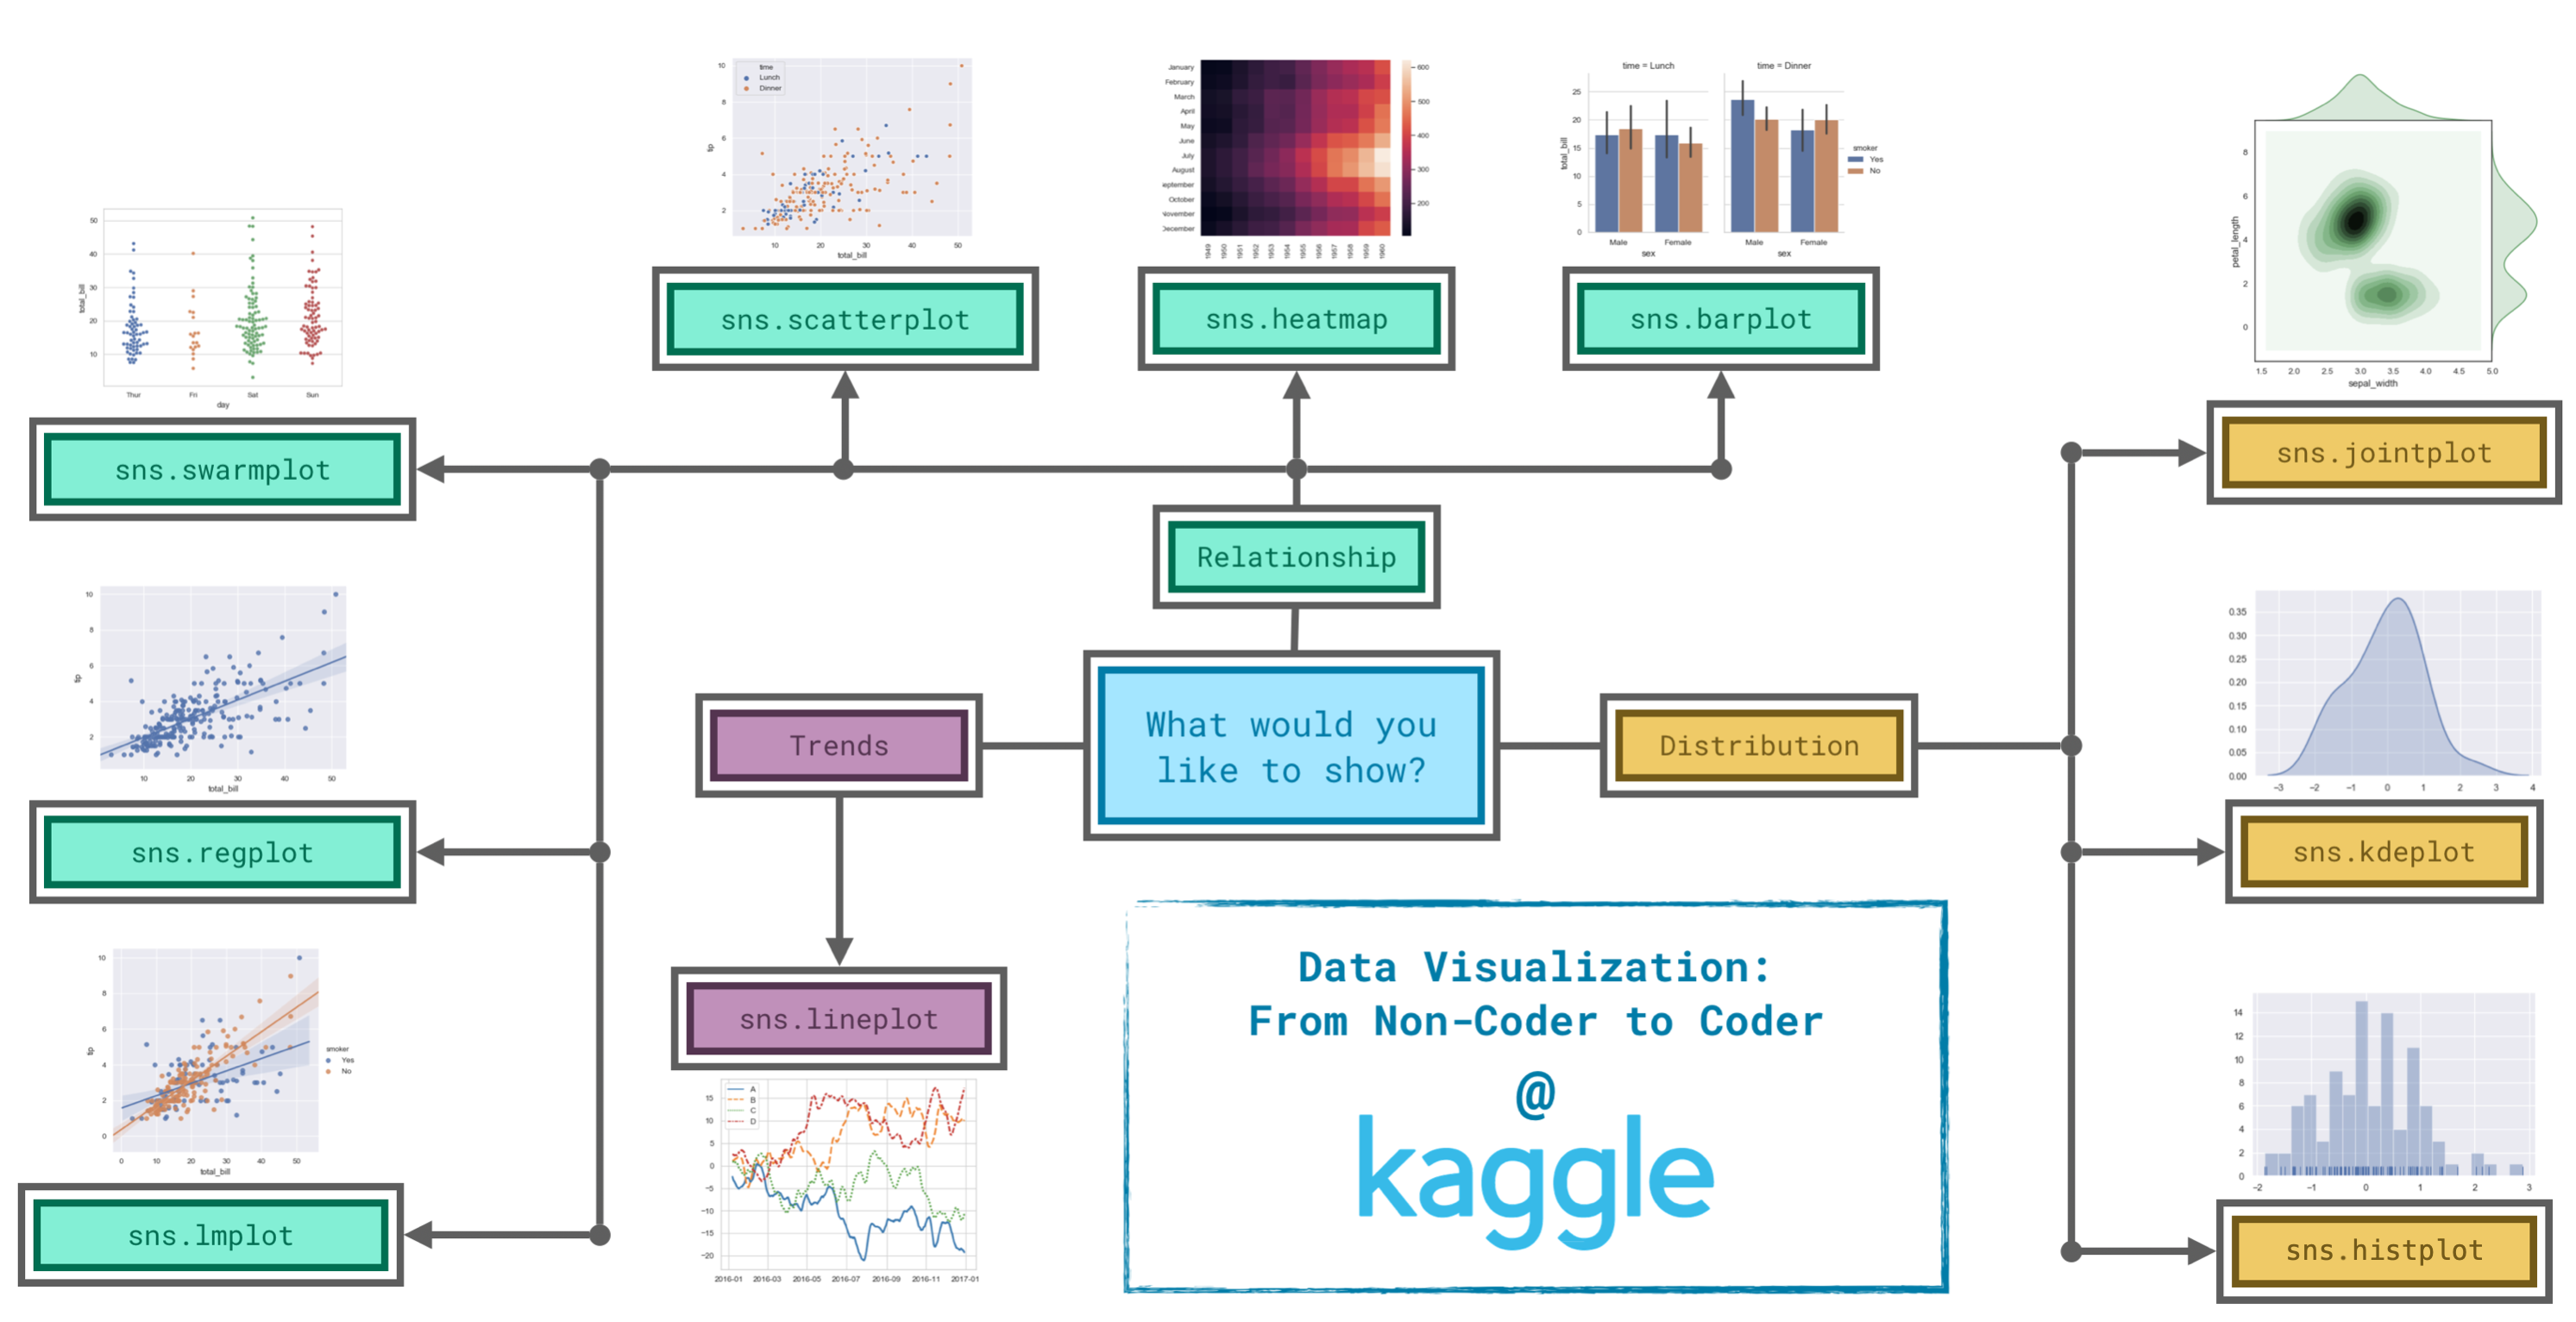

source: https://www.kaggle.com/code/alexisbcook/choosing-plot-types-and-custom-styles